In [1]:
filename = "assets/bank-additional.csv"
grpby = ['education', 'job']
aggcols=['marital.divorced', 'marital.married',
       'marital.single', 'marital.unknown', 'housing.no', 'housing.unknown',
       'housing.yes', 'contact.cellular', 'contact.telephone']


In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

In [8]:
#functions
create_df = lambda f,s: pd.read_csv(f, sep=s)
prefix_column = lambda colist, prefix : [prefix + i for i in colist]
build_dict = lambda test_keys, test_values : {test_keys[i]: test_values[i] for i in range(len(test_keys))}


def create_dummies(df, dum_col):
    df_dum = pd.get_dummies(df[dum_col])
    cols = df_dum.columns
    pcols = prefix_column(cols,dum_col+".")
    d = build_dict(cols, pcols)
    df_dum.rename(columns=d, inplace=True)
    return pd.concat([df, df_dum], axis='columns')

def create_grpby_df(df, grpby_cols):
    return df.groupby(by=grpby_cols, axis=0, sort=True)

def create_grpby_avg_df(df, grpby_cols, cols):
    return df[cols].mean()

def create_grpby_sum_df(df, grpby_cols, cols):
    return df[cols].sum()

def create_grpby_count_df(df, grpby_cols, cols):
    return df[cols].count()

def drawfig(dfx, choice_made, x_col):

    marital= [  'marital.divorced'
              , 'marital.married'
              , 'marital.single'
              , 'marital.unknown']

    housing = [ 'housing.no'
               , 'housing.unknown'
               , 'housing.yes'] 

    contact = [  'contact.cellular'
               , 'contact.telephone']

    color_pal=['#92A5E8'
           , '#8E44AD'
           , '#FFC300'
           ,'#AAA100']
    
    choice = {  "Marital" : marital
              , "Housing" : housing
              , "Contact" : contact}


    mydata = []

    print(choice[choice_made][0])

    for it in range(len(choice[choice_made])):
        col = choice[choice_made][it]
        # print(col)
        myd = go.Bar(x=dfx['job'], y=dfx[col], name = col.title(), marker=dict(color=color_pal[it]))
        mydata.append(myd)
        # print (myd)

    mylayout = go.Layout(
        title='Grouped Bar Chart',
        xaxis = dict(title = x_col.title()), # x-axis label
        yaxis = dict(title = str(choice_made).title()), # y-axis label

    )
    fig = go.Figure(data=mydata, layout=mylayout)
    return fig



In [9]:
df = create_df(filename, ";")

df = create_dummies(df, 'marital')
df = create_dummies(df, 'housing')
df = create_dummies(df, 'contact')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,marital.divorced,marital.married,marital.single,marital.unknown,housing.no,housing.unknown,housing.yes,contact.cellular,contact.telephone
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,no,0,1,0,0,0,0,1,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,no,0,0,1,0,1,0,0,0,1
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,no,0,1,0,0,0,0,1,0,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,no,0,1,0,0,0,1,0,0,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,no,0,1,0,0,0,0,1,1,0


In [10]:
#df = df.query(" job == 'student' ")
dfg = create_grpby_df(df, grpby)
#dfa = create_grpby_avg_df(dfg, grpby, aggcols)
dfc = create_grpby_count_df(dfg, grpby, aggcols)
dfs = create_grpby_sum_df(dfg, grpby, aggcols)

In [11]:
dfx = pd.DataFrame(dfs)
dfx.reset_index(inplace=True)
#dfx = dfx.query("education == 'basic.9y' ")
dfx.head()

,education,job,marital.divorced,marital.married,marital.single,marital.unknown,housing.no,housing.unknown,housing.yes,contact.cellular,contact.telephone
0,basic.4y,admin.,1.0,5.0,2.0,0.0,3.0,0.0,5.0,6.0,2.0
1,basic.4y,blue-collar,19.0,168.0,34.0,1.0,107.0,5.0,110.0,124.0,98.0
2,basic.4y,entrepreneur,2.0,16.0,0.0,0.0,6.0,1.0,11.0,9.0,9.0
3,basic.4y,housemaid,8.0,41.0,3.0,0.0,29.0,1.0,22.0,32.0,20.0
4,basic.4y,management,1.0,10.0,2.0,0.0,5.0,0.0,8.0,6.0,7.0


marital.divorced


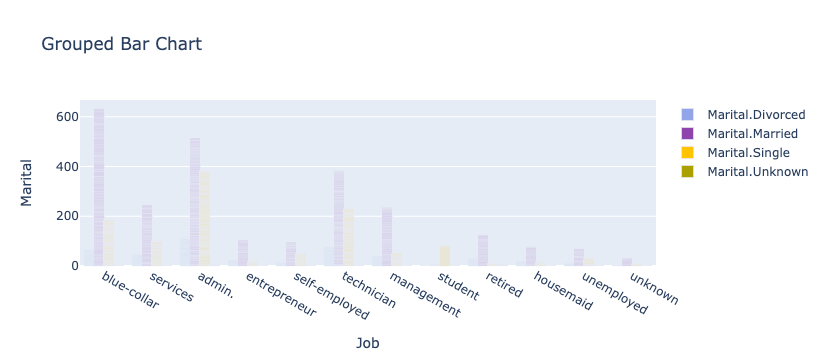

In [16]:
choice_made = 'Marital'
x_col = 'job'

drawfig(dfx, choice_made, x_col).show()

housing.no


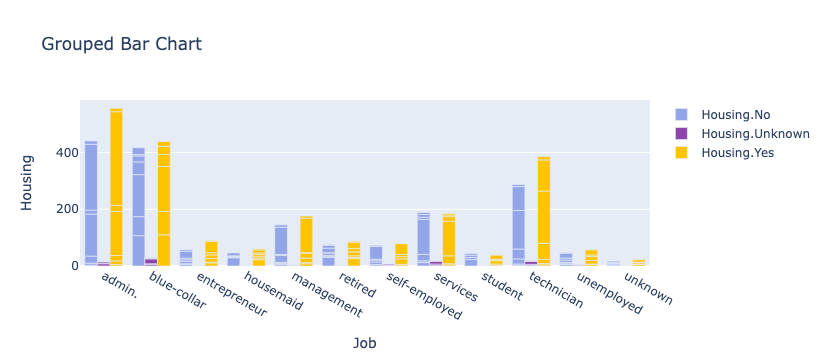

In [13]:
choice_made = 'Housing'
x_col = 'job'

drawfig(dfx, choice_made, x_col).show()

contact.cellular


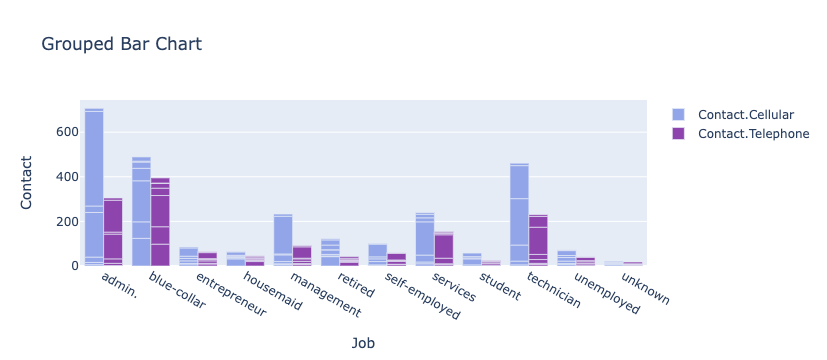

In [14]:
choice_made = 'Contact'
x_col = 'job'

drawfig(dfx, choice_made, x_col).show()